In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
import os
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Model,Sequential, Input, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.applications import DenseNet121

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install split-folders
import splitfolders as sf
input_folder="/content/drive/MyDrive/x-ray"
output = "/content/Xray-final"
sf.ratio(input_folder , output="Xray" , seed=42 , ratio=(.8,.2))

Copying files: 2541 files [08:50,  4.79 files/s]


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
from keras.models import *
from keras.preprocessing import *  #For Data prerpocessing before making my own Model
from keras.layers import *
import PIL
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
# import BatchNormalization
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )
#using Rescale only in Testing
test_datagen=ImageDataGenerator(
    rescale = 1./255
)
valid_datagen = ImageDataGenerator(
    rescale=1./255
)
   
training_set = train_datagen.flow_from_directory(
     r'/content/Xray/train',
     target_size=(224, 224),
     batch_size=32,
     class_mode='categorical')

test_set = test_datagen.flow_from_directory(
    r'/content/Xray/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 2032 images belonging to 2 classes.
Found 509 images belonging to 2 classes.


In [ ]:
model_d=DenseNet121(weights='imagenet',include_top=False, input_shape=(128, 128, 3)) 

x=model_d.output

x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

preds=Dense(2,activation='softmax')(x) #FC-layer

29089792/29084464 [==============================] - 0s 0us/step


In [ ]:
model=Model(inputs=model_d.input,outputs=preds)
#model.summary()

In [ ]:
for layer in model.layers[:-8]:
    layer.trainable=False
    
for layer in model.layers[-8:]:
    layer.trainable=True

In [ ]:
model.compile(optimizer=' ',loss='categorical_crossentropy',metrics=['accuracy'])
#model.summary()

In [ ]:
results = model.fit(
    training_set,
    batch_size = 32,
    epochs = 100,
    validation_data = test_set,
)

Epoch 1/100
64/64 [==============================] - 54s 652ms/step - loss: 0.2632 - accuracy: 0.9129 - val_loss: 0.4429 - val_accuracy: 0.8585
Epoch 2/100
64/64 [==============================] - 39s 610ms/step - loss: 0.0583 - accuracy: 0.9828 - val_loss: 0.0579 - val_accuracy: 0.9784
Epoch 3/100
64/64 [==============================] - 39s 608ms/step - loss: 0.0809 - accuracy: 0.9775 - val_loss: 0.0301 - val_accuracy: 0.9921
Epoch 4/100
64/64 [==============================] - 39s 607ms/step - loss: 0.0426 - accuracy: 0.9839 - val_loss: 0.0311 - val_accuracy: 0.9882
Epoch 5/100
64/64 [==============================] - 39s 605ms/step - loss: 0.0298 - accuracy: 0.9894 - val_loss: 0.0060 - val_accuracy: 0.9980
Epoch 6/100
64/64 [==============================] - 39s 602ms/step - loss: 0.0279 - accuracy: 0.9896 - val_loss: 0.0062 - val_accuracy: 0.9961
Epoch 7/100
64/64 [==============================] - 39s 608ms/step - loss: 0.0413 - accuracy: 0.9840 - val_loss: 0.0117 - val_accuracy:

Text(0, 0.5, 'Losses')

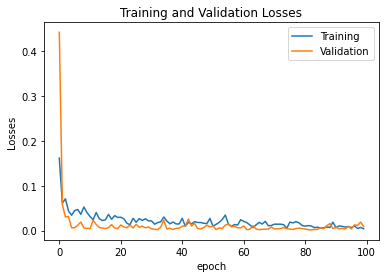

In [ ]:
results.history.keys()
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoch')
plt.ylabel('Losses')

Text(0, 0.5, 'Accuracy %')

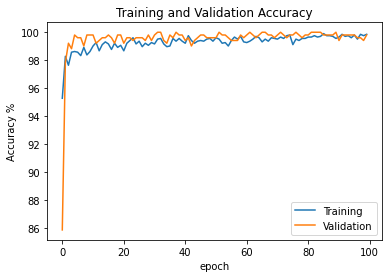

In [ ]:
acc=results.history['accuracy']
val_acc=results.history['val_accuracy']
acc=[100* i for i in acc]
val_acc=[ 100*i for i in val_acc]
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy %')

In [ ]:
model.save('/content/covid-19-densenet_121_V1_xray_2Classes.h5')

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/covid-19-densenet_121_V1_xray_2Classes')

In [ ]:
new_model.summary()